# 作业第6周（2）NLP分类练习

1.针对IMDb数据集，设计一个CNN网络，尝试分类操作。<BR>
注意：与图片CNN的2D卷积不同，NLP的卷积是1D卷积。<BR>
    (由于卷积核为一维，卷积核大小要相应增大到5或7，stride增加到3或5)。

In [1]:
#首先执行GPU资源分配代码，勿删除。
import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import numpy as np

max_features = 20000
maxlen = 380
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
word_index = keras.datasets.imdb.get_word_index (path='imdb_word_index.json')
index_to_word = {v:k for k,v in word_index.items()}
x_train_pad = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_pad = sequence.pad_sequences(x_val, maxlen=maxlen)

In [34]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

def conv1d():
    model = Sequential()
    model.add(Embedding(output_dim=32, input_dim=max_features, input_length=maxlen))
    model.add(Conv1D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [41]:
model = conv1d()
save_path = 'save/3190105708_6_1_convd1_latest.h5'
# history = model.fit(x_train_pad, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0.2)
# model.save_weights(save_path)
checkpointer = ModelCheckpoint(filepath=save_path, monitor="val_accuracy", mode="max", verbose=1, save_best_only=True)
history = model.fit(x_train_pad, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/5
156/157 [============================>.] - ETA: 0s - loss: 0.4539 - accuracy: 0.7572
Epoch 00001: val_accuracy improved from -inf to 0.88200, saving model to save/3190105708_6_1_convd1_latest.h5
157/157 [==============================] - 2s 12ms/step - loss: 0.4534 - accuracy: 0.7574 - val_loss: 0.2786 - val_accuracy: 0.8820
Epoch 2/5
155/157 [============================>.] - ETA: 0s - loss: 0.1599 - accuracy: 0.9408
Epoch 00002: val_accuracy improved from 0.88200 to 0.89140, saving model to save/3190105708_6_1_convd1_latest.h5
157/157 [==============================] - 2s 11ms/step - loss: 0.1596 - accuracy: 0.9409 - val_loss: 0.2808 - val_accuracy: 0.8914
Epoch 3/5
155/157 [============================>.] - ETA: 0s - loss: 0.0593 - accuracy: 0.9828
Epoch 00003: val_accuracy did not improve from 0.89140
157/157 [==============================] - 2s 11ms/step - loss: 0.0595 - accuracy: 0.9827 - val_loss: 0.4150 - val_accuracy: 0.8686
Epoch 4/5
154/157 [======================

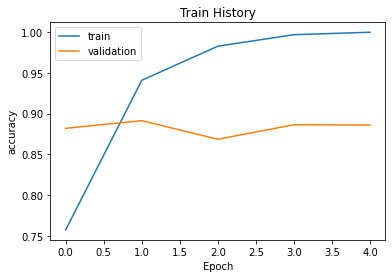

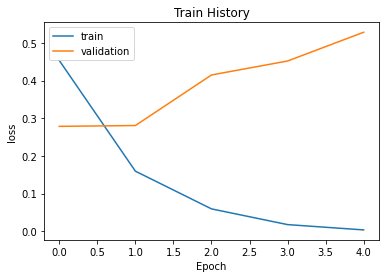

In [42]:
import matplotlib.pyplot as plt
def show_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

show_history(history, "accuracy", "val_accuracy")
show_history(history, "loss", "val_loss")

In [43]:
model = conv1d()
model.load_weights(save_path)
scores = model.evaluate(x_val_pad, y_val, verbose=1)

782/782 [==============================] - 2s 3ms/step - loss: 0.2982 - accuracy: 0.8833
